In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv")

In [3]:
print (df.columns)
df_sub = df[['latitude','longitude','depth','mag']].copy()

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


In [4]:
print (f"Initially df has a shape of: {df_sub.shape}")
# Test to see if there are any null values in columns of interest
df_sub.isnull().any()

Initially df has a shape of: (9593, 4)


latitude     False
longitude    False
depth        False
mag           True
dtype: bool

In [5]:
# Drop columns with null data
df_sub = df_sub[~df_sub['mag'].isnull()]
print (f"After preprocessing df has a shape of: {df_sub.shape}")

After preprocessing df has a shape of: (9592, 4)


In [6]:
#Another method to drop na
df_sub = df_sub.dropna(subset=['mag'])
print (f"After preprocessing df has a shape of: {df_sub.shape}")

After preprocessing df has a shape of: (9592, 4)


In [7]:
# or using iloc
features = df_sub.iloc[:, 0:3].values   # Input Features (Predictors, x )
label = df_sub.iloc[:, -1]              # OUTPUT (y)

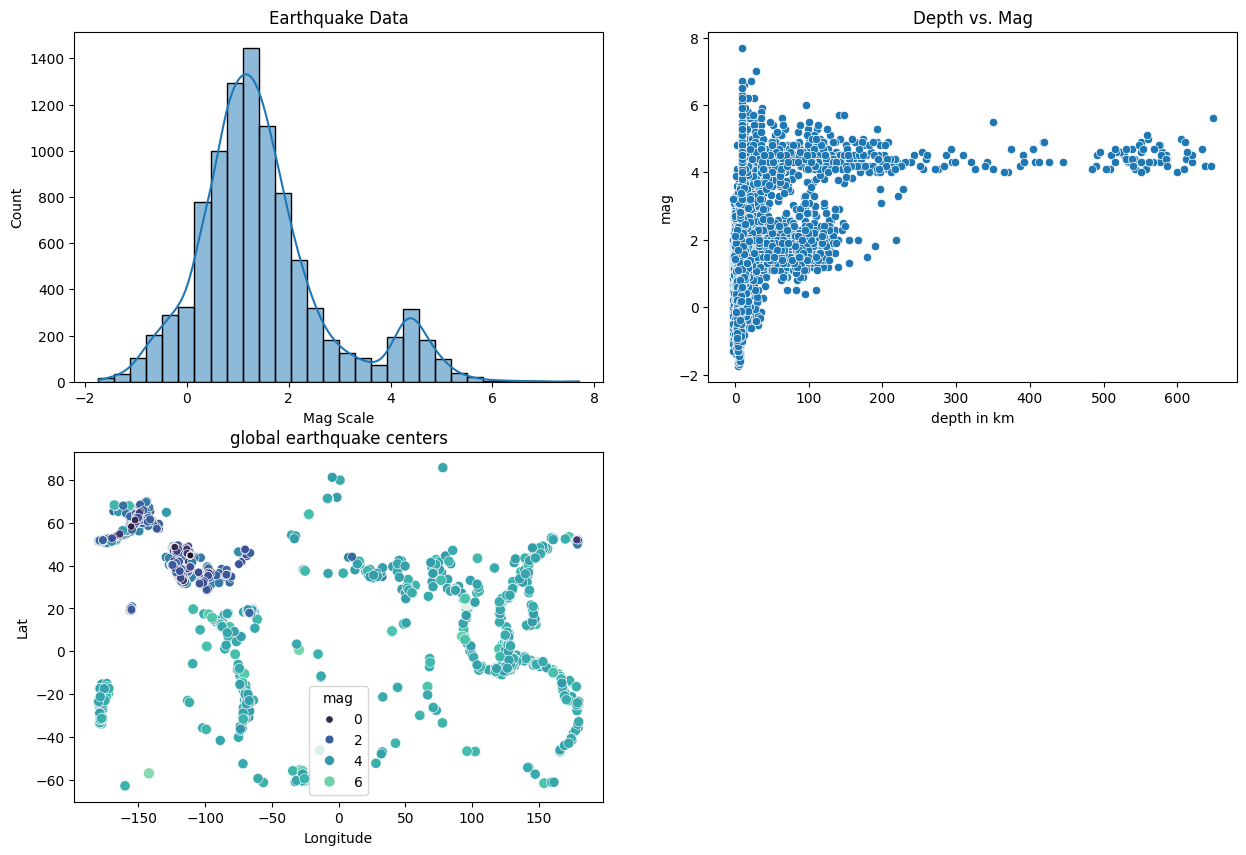

In [8]:
# Create a line chart
plt.figure(figsize=(15, 10))
# first subplot ---subplots
plt.subplot(2,2,1)
plt.title("Earthquake Data")
plt.xlabel("Mag Scale")
sb.histplot(df['mag'],kde=True,bins=30)

# Subplot 2
plt.subplot(2,2,2)
plt.title("Depth vs. Mag")
plt.xlabel("depth in km")
sb.scatterplot(x='depth', y='mag', data=df)


plt.subplot(2,2,3)
plt.title("global earthquake centers")
plt.xlabel("Longitude")
plt.ylabel("Lat")
sb.scatterplot(x="longitude",y="latitude", size='mag', data=df, hue='mag', palette='mako')


plt.show()



# sns.lineplot(x='Month', y='Sales', data=df, marker='o')

# # Add title and labels
# plt.title('Monthly Sales Data', fontsize=16)
# plt.xlabel('Month', fontsize=14)
# plt.ylabel('Sales', fontsize=14)

# # Show the plot
# plt.show()

In [21]:
# Random Forest
# Split the dataset into training and test sets
f_train, f_test, l_train, l_test = train_test_split(features, label, test_size=0.2, random_state=100)

# Create a linear regression model
model = RandomForestRegressor(n_estimators=5, random_state=100)

# Fit the model to the training data
trained_model = model.fit(f_train, l_train)

# Make predictions on the test set
predicted_mag = model.predict(f_test)
print (predicted_mag)

#RMSE most popular evaluation, but can use mean square error, r2 ...
ms_error = mean_squared_error(l_test, predicted_mag)
print (ms_error)

print(f"Model MSU : {ms_error:.4f}")


# # Evaluate the model
# accuracy = accuracy_score(l_test, l_pred)
# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_report(l_test, l_pred))
# print("Confusion Matrix:\n", confusion_matrix(l_test, l_pred))

# # Feature importance
# feature_importances = model.feature_importances_
# sorted_indices = np.argsort(feature_importances)[::-1]

# # Display feature importances
# print("\nFeature Importances:")
# for index in sorted_indices:
#     print(f"Feature {index + 1}: {feature_importances[index]:.4f}")



[ 0.58   1.488 -0.182 ...  1.44   1.28   0.872]
0.29390301615693587
Model MSU : 0.2939


Coefficient: [-0.02106583  0.0060053   0.00604869]
Intercept: 2.8537647138424034
Mean Squared Error: 0.9108321100271349
R^2 Score: 0.43653638208777035


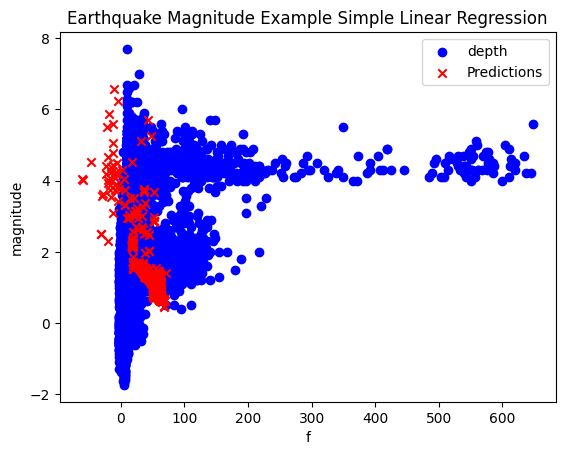

In [43]:
#Linear Regression
# Split the dataset into training and test sets
f_train, f_test, l_train, l_test = train_test_split(features, label, test_size=0.1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(f_train, l_train)

# Make predictions on the test set
l_pred = model.predict(f_test)

# Print the coefficients
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate and print the mean squared error and R^2 score
mse = mean_squared_error(l_test, l_pred)
r2 = r2_score(l_test, l_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the results

# Visualizing the results (only for a two-feature case)
plt.scatter(df_sub['depth'], df_sub['mag'], color='blue', label='depth')
plt.scatter(f_test[:, 0], l_pred, color='red', label='Predictions', marker='x')
plt.xlabel('f')
plt.ylabel('magnitude')
plt.title('Earthquake Magnitude Example Simple Linear Regression')
plt.legend()
plt.show()